## import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.fft import fft, ifft, dct, fftfreq
from scipy.fft import rfft, rfftfreq
from scipy import signal
%matplotlib inline

In [5]:
def read_THz(fname):
    df = pd.read_csv(fname, sep='\t') 
    time = np.array(df.values[:,0]).astype(float)
    pulse = np.array(df.values[:,1]).astype(float)
    return time, pulse 

In [6]:
# time_bkg, pulse_bkg = read_THz(r"C:\Users\prosp\Documents\FYS 203-JAN\LAB_THZ_DATA\2024_01_23\papers\backgr_paper__V_u.txt")
# time_pc, pulse_pc = read_THz(r"C:\Users\prosp\Documents\FYS 203-JAN\LAB_THZ_DATA\2024_01_23\papers")

# plt.figure()
# plt.plot(time_bkg, pulse_bkg,label='background')
# plt.plot(time_pc, pulse_pc,label='pt09009')
# plt.xlabel('Time [ps]')
# plt.ylabel('Amplitude') 
# plt.grid(color=[0.7, 0.7, 0.7], linestyle='--')
# plt.legend()


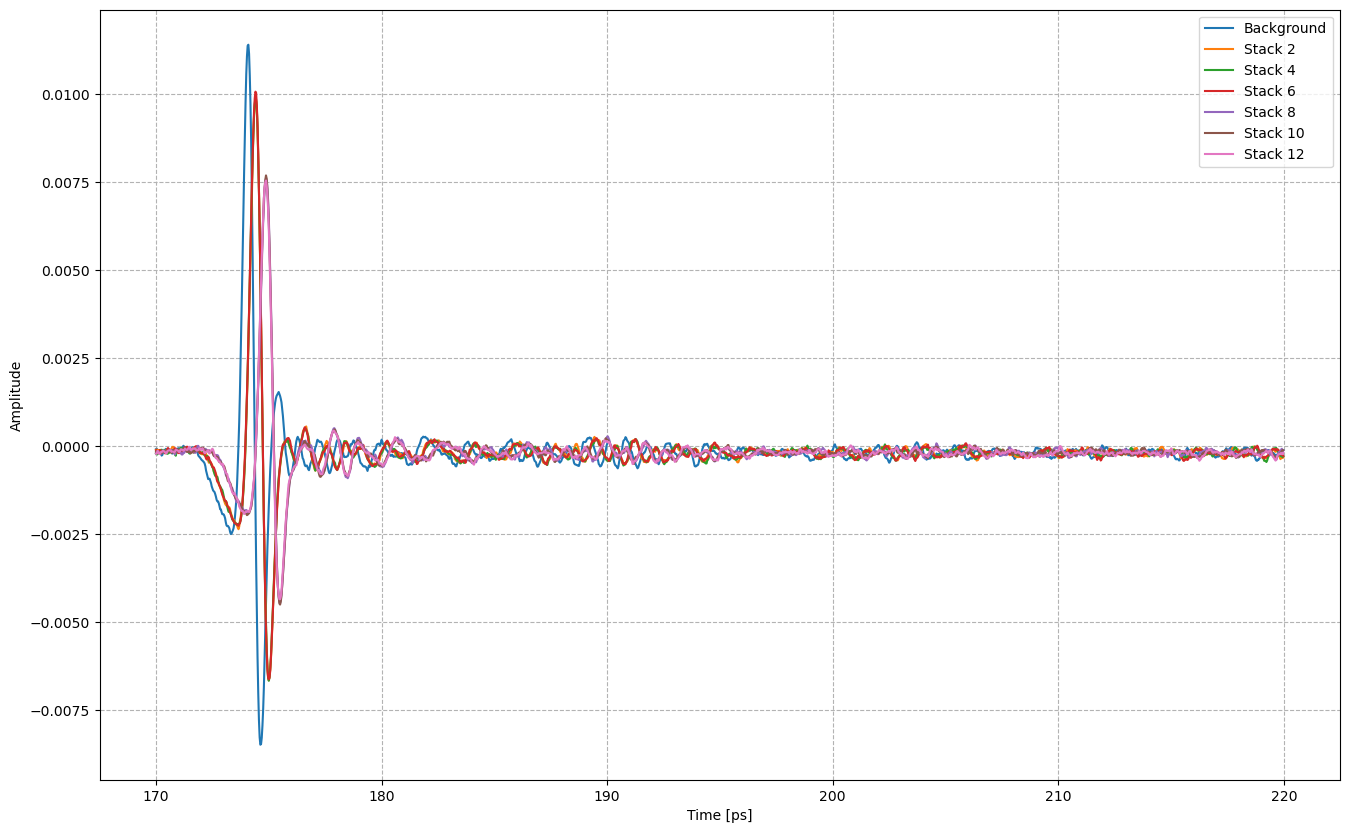

In [29]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read THz data
def read_THz(fname):
    try:
        df = pd.read_csv(fname, sep='\t') 

        # Manually specify column names based on your file structure
        time_col = 'time'  # Change this based on your actual column names
        pulse_col = 'Y'  # Change this based on your actual column names

        # Convert only numeric values, ignore non-numeric values
        time = pd.to_numeric(df[time_col], errors='coerce')
        pulse = pd.to_numeric(df[pulse_col], errors='coerce')

        # Remove NaN values
        time = time[~np.isnan(time)]
        pulse = pulse[~np.isnan(pulse)]

        return time, pulse
    except Exception as e:
        print(f"Error reading file {fname}: {e}")
        return np.array([]), np.array([])

# Directory path
directory_path = r"C:\Users\prosp\Documents\FYS 203-JAN\LAB_THZ_DATA\2024_01_23\papers"

# Get a list of all files in the directory that end with '.txt'
paper_file_pattern = os.path.join(directory_path, '*_pap_*__*.txt')  # Assuming paper files have names containing '_pap_'
paper_file_list = glob.glob(paper_file_pattern)

# Initialize lists to store data
background_times, background_pulses = read_THz(r"C:\Users\prosp\Documents\FYS 203-JAN\LAB_THZ_DATA\2024_01_23\papers\backgr_paper__V_u.txt")

paper_stacks_times = []
paper_stacks_pulses = []

# Read paper files
for paper_file in paper_file_list:
    # Skip settings files
    if 'settings' in paper_file.lower():
        continue

    time, pulse = read_THz(paper_file)
    if 'backgr' in paper_file.lower():
        continue  # Skip background file
    paper_stacks_times.append(time)
    paper_stacks_pulses.append(pulse)

# Plotting
plt.figure(figsize = (16,10))

# Plot background
plt.plot(background_times, background_pulses, label='Background', linestyle='-')

# Plot paper stacks
for time, pulse, stack_number in zip(paper_stacks_times, paper_stacks_pulses, [2, 4, 6, 8, 10, 12]):
    plt.plot(time, pulse, label=f'Stack {stack_number}')

plt.xlabel('Time [ps]')
plt.ylabel('Amplitude') 
plt.grid(color=[0.7, 0.7, 0.7], linestyle='--')
plt.legend()
plt.show()


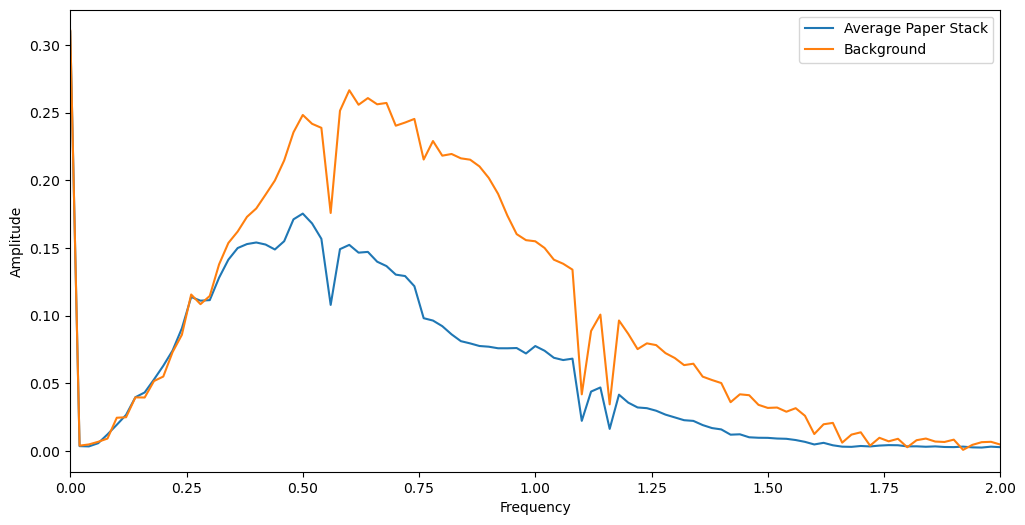

In [21]:
from scipy.fft import rfft, rfftfreq

# Assuming paper_stacks_times and paper_stacks_pulses are the lists of time arrays and pulse arrays for each paper stack
# Also assuming background_times and background_pulses are the time and pulse arrays for the background

# Function to compute frequency domain signal
def compute_frequency_spectrum(time, pulse):
    dt = time[1] - time[0]
    freq = rfftfreq(len(time), dt)
    
    # Make a copy of the pulse array to ensure alignment
    pulse_copy = np.array(pulse, copy=True, dtype=np.float64)
    
    spectrum = np.abs(rfft(pulse_copy))[:len(freq)]
    return freq, spectrum

# Compute frequency spectra for each paper stack
paper_stacks_freq = []
paper_stacks_spectra = []

for time, pulse in zip(paper_stacks_times, paper_stacks_pulses):
    freq, spectrum = compute_frequency_spectrum(time, pulse)
    paper_stacks_freq.append(freq)
    paper_stacks_spectra.append(spectrum)

# Compute frequency spectrum for the background
freq_bkg, bkg_spectrum = compute_frequency_spectrum(background_times, background_pulses)

# Average spectra for the paper stacks
avg_paper_spectrum = np.mean(paper_stacks_spectra, axis=0)

# Plotting
plt.figure(figsize=(12, 6))

# Plot average paper spectrum
plt.plot(paper_stacks_freq[0], avg_paper_spectrum, label="Average Paper Stack")

# Plot background spectrum
plt.plot(freq_bkg, bkg_spectrum, label="Background")

plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.xlim(0, 2)
plt.legend()
plt.show()



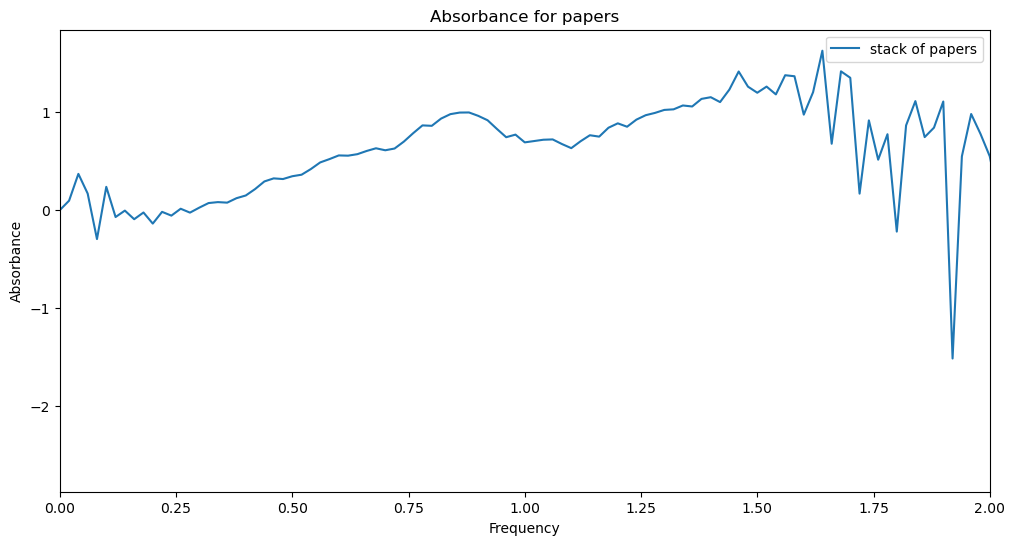

In [24]:
abs_pc = -np.log(avg_paper_spectrum/bkg_spectrum)
plt.figure(figsize = (12,6))
plt.plot(freq, abs_pc , label = "stack of papers")

           
plt.xlabel("Frequency")   
plt.ylabel("Absorbance")
plt.title("Absorbance for papers")
plt.xlim(0,2)
plt.legend()